**Stat 451 Final Project- Plots**

*Dylan Asoh, Logan O'Brien, Samuel Peterson*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**The purpose of these visuals was to get a better understanding of our data before cleaning and working with models.**

In [3]:
data = pd.read_csv("train.csv")

<AxesSubplot:>

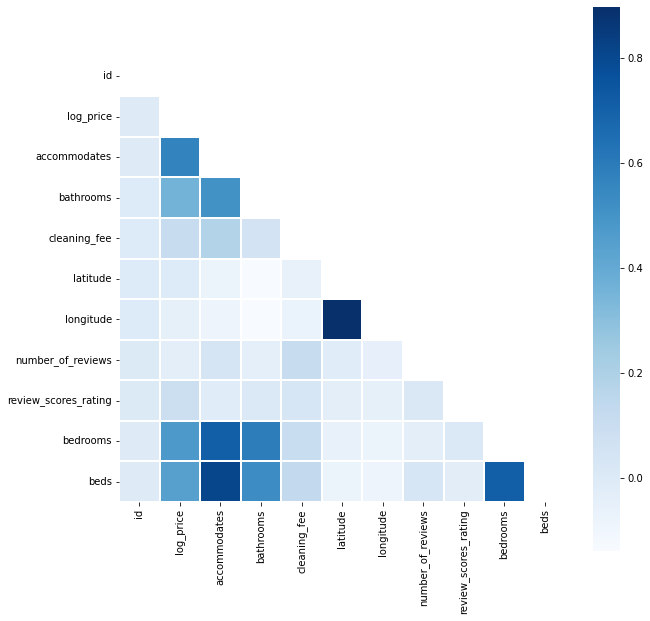

In [5]:
f,ax = plt.subplots(figsize=(10, 10))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), cmap="Blues", mask=mask, linewidths=0.4, square=True)

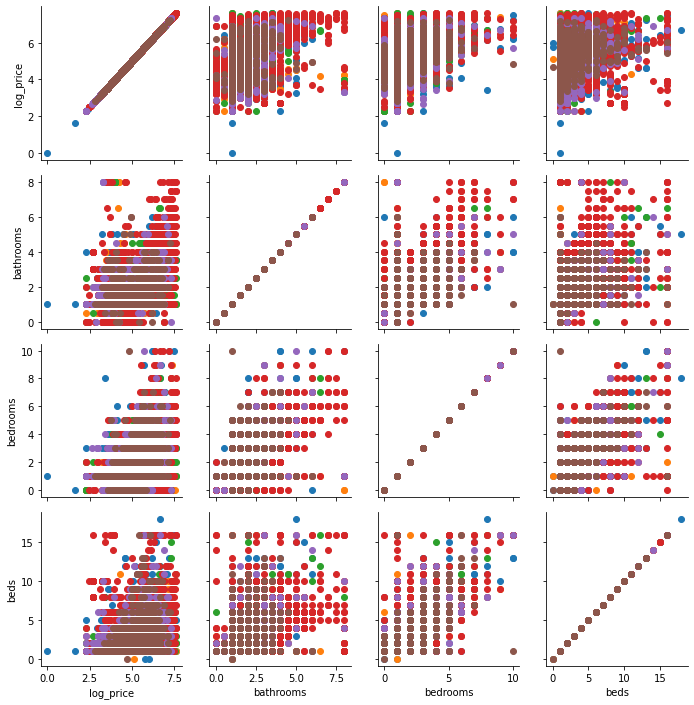

In [5]:
g = sns.PairGrid(data, hue="city", vars=["log_price", "bathrooms","bedrooms", "beds" ])
g = g.map(plt.scatter)

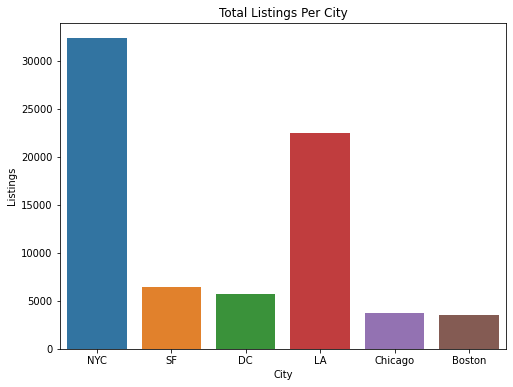

In [18]:
f,ax = plt.subplots(figsize=(8, 6))
sns.countplot(x ='city', data = data)
ax.set_xlabel('City')
ax.set_ylabel('Listings')
ax.set_title('Total Listings Per City')
f.savefig('ListingsPerCity.png')

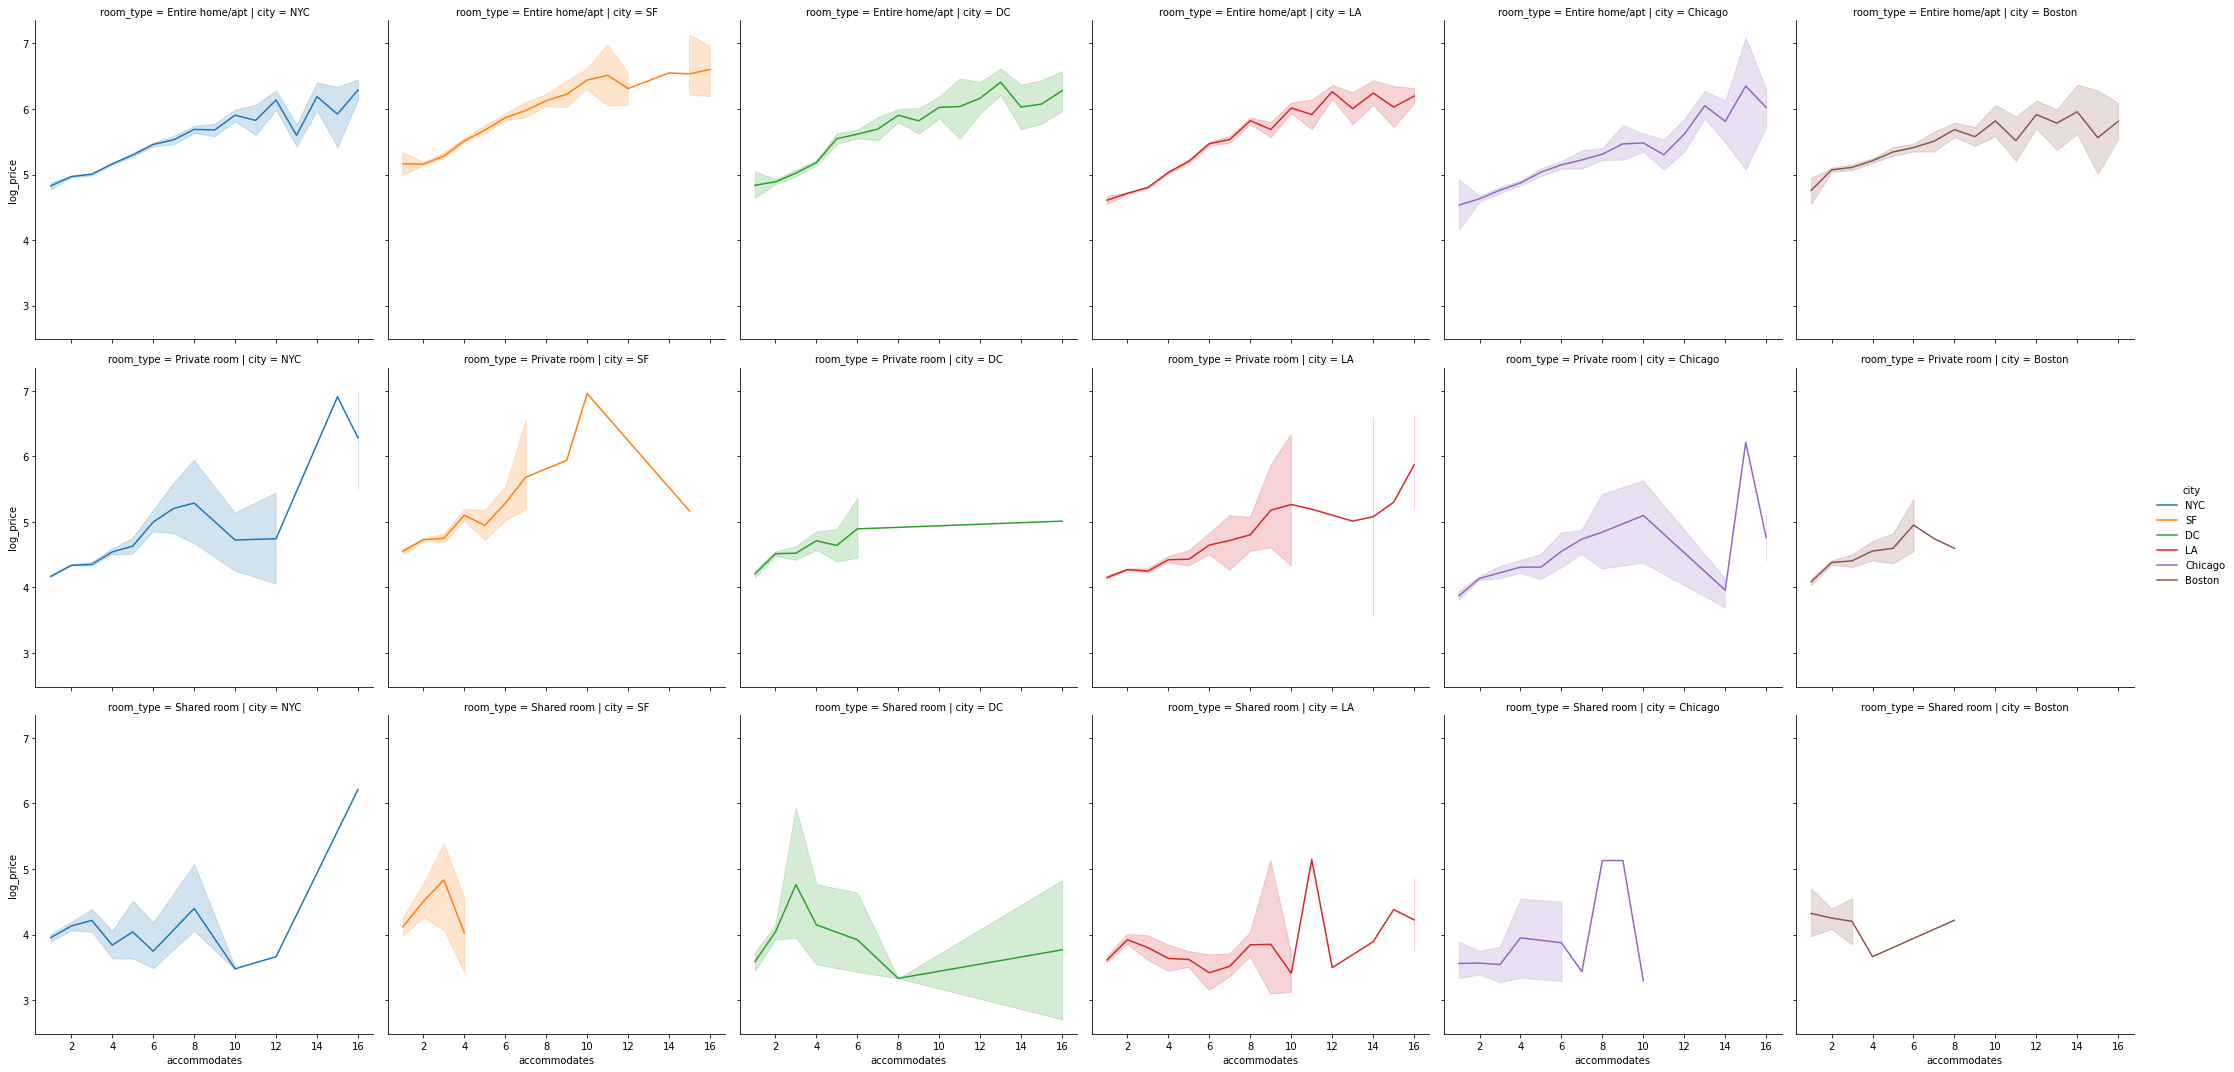

In [7]:
sns.relplot(x='accommodates', y='log_price', kind='line', data=data, col="city", row = "room_type", hue='city')

In [6]:
def amenity_totals(listing):
    if len(listing) != 0:
        amenities = (listing.split(","))
        if "translation missing: en.hosting_amenity_50" in amenities:
            return len(amenities - 1)
        else:
            return len(amenities)
    else:
        return 0
amenity_data = data.copy()
amenity_data["amenities"] = amenity_data["amenities"].apply(amenity_totals)

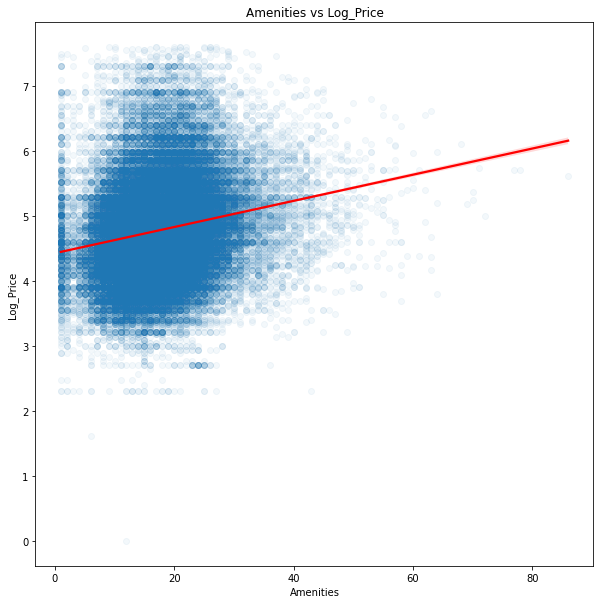

In [20]:
f,ax = plt.subplots(figsize=(10, 10))
sns.regplot(x='amenities', y='log_price', data=amenity_data, scatter_kws={'alpha':0.05}, line_kws={"color": "red"})
ax.set_xlabel('Amenities')
ax.set_ylabel('Log_Price')
ax.set_title('Amenities vs Log_Price')
f.savefig('AmenitiesVsPrice.png')

<AxesSubplot:xlabel='room_type', ylabel='city'>

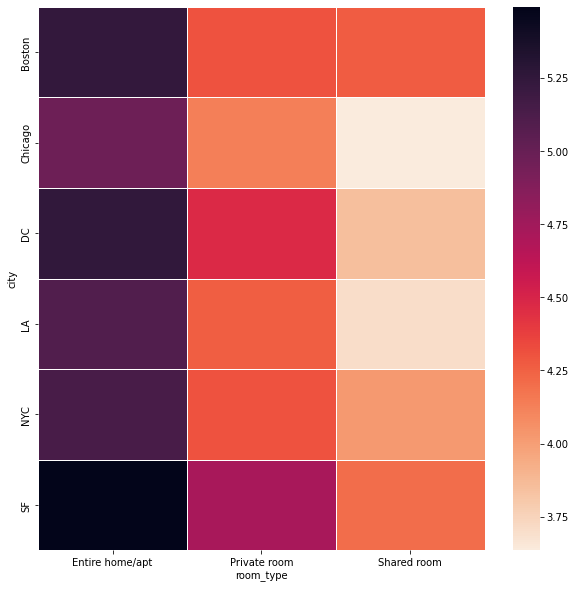

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(amenity_data.groupby(['city', 'room_type']).log_price.mean().unstack(), cmap=sns.cm.rocket_r, annot=False, linewidth=1, linecolor='w',)